# Bulldozer Price Bluebook

## Data Analysis

In [1]:
# Data Analysis and visualisation tools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

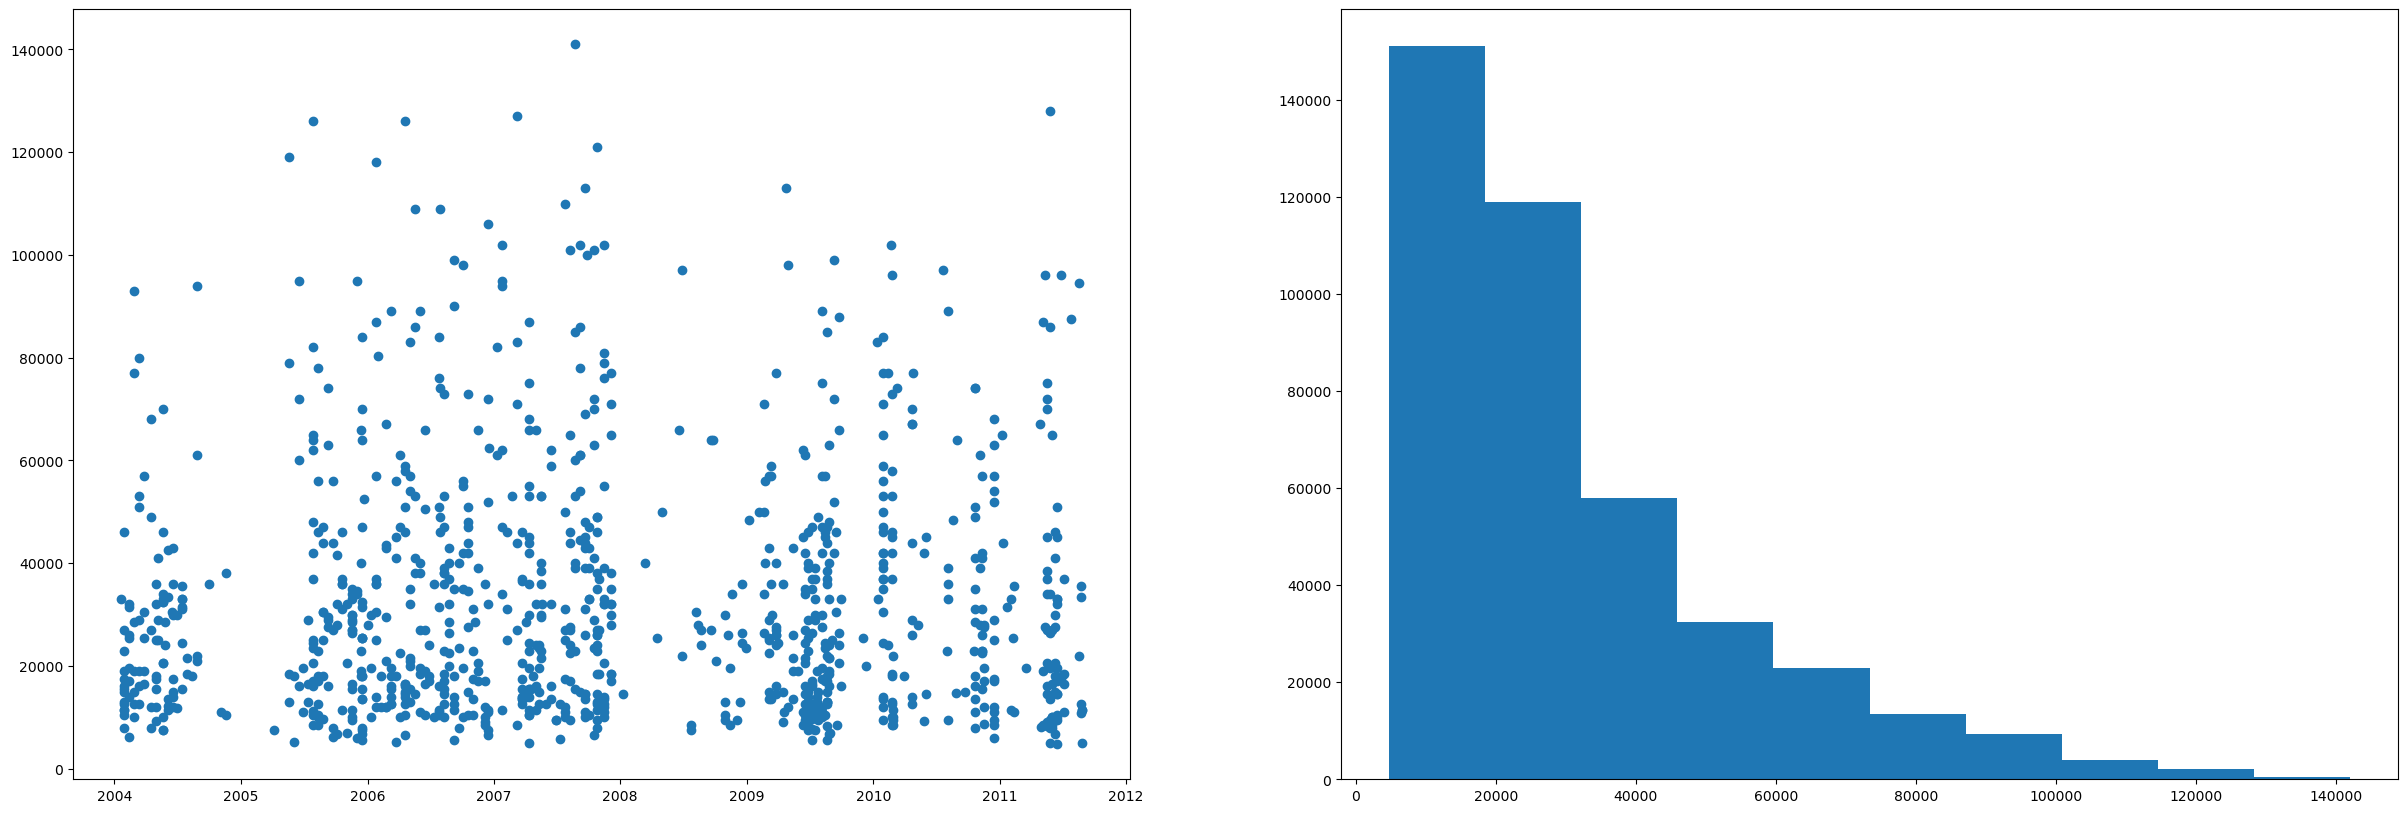

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30, 10))
ax1.scatter(df.saledate[:1000], df.SalePrice[:1000])
ax2.hist(df.SalePrice);

In [5]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [6]:
df.sort_values(by=["saledate"], inplace=True)
df.reset_index(inplace=True)
df.saledate.head()

0   1989-01-17
1   1989-01-31
2   1989-01-31
3   1989-01-31
4   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [7]:
df_temp = df.copy()

In [8]:
df_temp["Day"] = df_temp.saledate.dt.day
df_temp["Month"] = df_temp.saledate.dt.month
df_temp["Year"] = df_temp.saledate.dt.year
df_temp["dayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["dayOfYear"] = df_temp.saledate.dt.dayofyear
df_temp.drop("saledate", axis=1, inplace=True)

df_temp.head().T

,0,1,2,3,4
index,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN


## Modelling Data

In [9]:
str_features = df.select_dtypes("object").columns
for feature in str_features:
    df_temp[feature] = df_temp[feature].astype("category").cat.as_ordered()

In [80]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 104 entries, index to Steering_Controls_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(6), int8(40)
memory usage: 73.2 MB


### Handling Missing Values

In [11]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content) and df_temp[label].isna().sum():
        df_temp[label + "_missing"] = content.isna()
        df_temp[label] = content.fillna(content.median())

In [12]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label + "_missing"] = content.isna()
        df_temp[label] = content.cat.codes + 1

In [13]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 104 entries, index to Steering_Controls_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(6), int8(40)
memory usage: 73.2 MB


In [14]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

CPU times: total: 43min 36s
Wall time: 12min 41s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [15]:
model.score(df_temp.drop("SalePrice", axis=1), df_temp.SalePrice)

0.9875336682079215

### Split Data

In [16]:
df_valid, df_train = df_temp[df_temp.Year == 2012], df_temp[df_temp.Year != 2012]

In [17]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid.SalePrice

### Evaluate Model

In [18]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [19]:
def eval_model(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    return {"train_rmsle": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "valid_rmsle": np.sqrt(mean_squared_log_error(y_valid, val_preds)),
            "train_mae": mean_absolute_error(y_train, train_preds),
            "valid_mae": mean_absolute_error(y_valid, val_preds)}

In [20]:
%%time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train, y_train)

CPU times: total: 58 s
Wall time: 17.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [21]:
eval_model(model)

{'train_rmsle': 0.2576974058955809,
 'valid_rmsle': 0.29853907501825405,
 'train_mae': 5560.419946450606,
 'valid_mae': 7245.808970016417}

## Hyperparameter Tuning

In [26]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_samples": [10000],
           "max_depth": [None, 3, 5, 10],
           "max_features": [0.5, 1, "sqrt"],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rs_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 53.5 s
Wall time: 52.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [27]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [28]:
eval_model(rs_model)

{'train_rmsle': 0.3985973677016268,
 'valid_rmsle': 0.43125258530477545,
 'train_mae': 9115.322099843968,
 'valid_mae': 10786.294024945697}

## Final Model

In [30]:
estimator = RandomForestRegressor(n_jobs=-1,
                                  n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  max_samples=None)

estimator.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [31]:
eval_model(estimator)

{'train_rmsle': 0.14418701068654996,
 'valid_rmsle': 0.25514537029574,
 'train_mae': 2946.113295491851,
 'valid_mae': 6102.682340008002}

## Model Testing

In [99]:
df_test = pd.read_csv("./data/Test.csv", low_memory=False, parse_dates=["saledate"])

In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [98]:
def preprocess_data(df):
    df["Day"] = df["saledate"].dt.day
    df["Month"] = df["saledate"].dt.month
    df["Year"] = df["saledate"].dt.year
    df["dayOfWeek"] = df["saledate"].dt.dayofweek
    df["dayOfYear"] = df["saledate"].dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isna().sum():
                df[label + "_missing"] = content.isna()
                df[label] = content.fillna(content.median())
        else:
            df[label + "_missing"] = content.isna()
            df[label] = pd.Categorical(content).codes + 1
    return df

In [101]:
df_test = preprocess_data(df_test)

In [108]:
set(X_train.columns) - set(df_test.columns)

set()

In [105]:
df_test["index"] = np.arange(1, len(df_test) + 1)

In [107]:
df_test["auctioneerID_missing"] = False

In [112]:
test_preds = estimator.predict(df_test)

In [111]:
df_test = df_test[X_train.columns]

## Feature Importance

In [122]:
importances = pd.DataFrame(dict(Feature_Importance=estimator.feature_importances_, Features=df_temp.columns[1:])).sort_values("Feature_Importance")

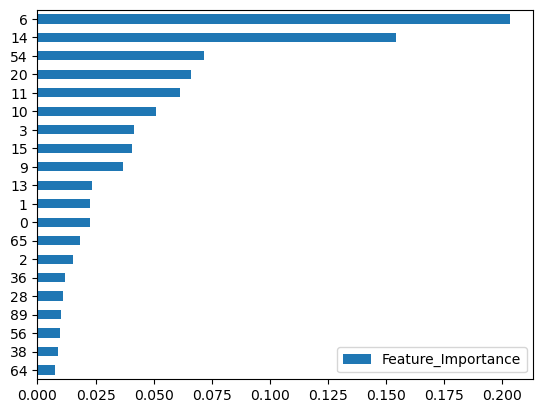

In [125]:
importances[(len(importances) - 20):].plot.barh();